In [3]:
import tensorflow as tf
import sys
from tensorflow import keras
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Note: NumExpr detected 10 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.

NumExpr defaulting to 8 threads.

In [4]:
# print(sys.version)

# print(tf.__version__)
# c=tf.constant(10)
# print(c)

# c1=tf.constant([1,2,3])
# print(c1)

# c2=tf.constant([[1.,2.,3.],[4.,5.,6.]])
# print(c2)

# print("cut 1",c2[:,-1])
# print("cut 2",c2[:-1])

# print("second number",c2[...,0])

# c3=c2+tf.cast(c,dtype=tf.float32)
# print(c3)


In [5]:
import sys
sys.path

['/Users/jiangxinyu/Desktop/CV-Study-Note',
 '/Users/jiangxinyu/miniforge3/lib/python310.zip',
 '/Users/jiangxinyu/miniforge3/lib/python3.10',
 '/Users/jiangxinyu/miniforge3/lib/python3.10/lib-dynload',
 '',
 '/Users/jiangxinyu/miniforge3/lib/python3.10/site-packages']

In [30]:
# import pip

# def install(package):
#     pip.main(['install', package])

# install('pydot')

In [25]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

x_train_real, x_valid, y_train_real, y_valid=train_test_split(x_train, y_train, test_size=0.2)
print(x_train_real.shape)

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train_real.reshape(-1,1)).reshape(-1,28,28)
x_valid_scaled=scaler.transform(x_valid.reshape(-1,1)).reshape(-1,28,28)
x_test_scaled=scaler.transform(x_test.reshape(-1,1)).reshape(-1,28,28)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(48000, 28, 28)


In [26]:
x_train=np.expand_dims(x_train_scaled,-1)
x_valid=np.expand_dims(x_valid_scaled,-1)
x_test=np.expand_dims(x_test_scaled,-1)
print(x_train.shape)

(48000, 28, 28, 1)


In [27]:
model=keras.models.Sequential([
    keras.Input(shape=(28,28,1)),
    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10,activation='softmax')
])

In [28]:
model.compile(loss='sparse_categorical_crossentropy', optimizer ='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dropout_1 (Dropout)         (None, 5408)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
__________________________________________________

In [29]:
keras.utils.plot_model(model,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [13]:
history=model.fit(x_train_scaled, y_train_real, epochs=10, validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0280 - accuracy: 0.9907 - val_loss: 0.0478 - val_accuracy: 0.9848
Epoch 2/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0261 - accuracy: 0.9910 - val_loss: 0.0515 - val_accuracy: 0.9853
Epoch 3/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0230 - accuracy: 0.9922 - val_loss: 0.0548 - val_accuracy: 0.9853
Epoch 4/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0213 - accuracy: 0.9928 - val_loss: 0.0492 - val_accuracy: 0.9859
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0200 - accuracy: 0.9935 - val_loss: 0.0491 - val_accuracy: 0.9866
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0197 - accuracy: 0.9933 - val_loss: 0.0508 - val_accuracy: 0.9859
Epoch 7/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0184 - accuracy: 0.9938 - val_loss: 0.0527 - val_ac

In [14]:
print(history.history)

{'loss': [0.028036419302225113, 0.026062361896038055, 0.023035362362861633, 0.02126498706638813, 0.02001149393618107, 0.01969141885638237, 0.018421489745378494, 0.016685647889971733, 0.018153181299567223, 0.014123926870524883], 'accuracy': [0.9907083511352539, 0.9909791350364685, 0.9921666383743286, 0.9928125143051147, 0.9935207962989807, 0.9933333396911621, 0.9937916398048401, 0.9942499995231628, 0.9937499761581421, 0.9949374794960022], 'val_loss': [0.04781134054064751, 0.05148597061634064, 0.05476928502321243, 0.049232251942157745, 0.049124911427497864, 0.0507698580622673, 0.05273442715406418, 0.052639443427324295, 0.05787516385316849, 0.056989800184965134], 'val_accuracy': [0.984833300113678, 0.9853333234786987, 0.9853333234786987, 0.9859166741371155, 0.9865833520889282, 0.9859166741371155, 0.9860000014305115, 0.9862499833106995, 0.9839166402816772, 0.98458331823349]}


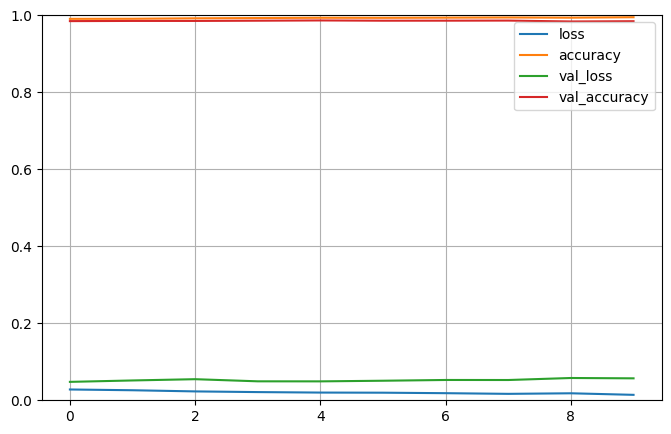

In [18]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [19]:
model.evaluate(x_test, y_test)


313/313 [==============================] - 2s 5ms/step - loss: 0.0662 - accuracy: 0.9839


[0.06621897965669632, 0.9839000701904297]

In [20]:
probility_model=tf.keras.Sequential([model,])


In [21]:
img=x_test_scaled[0]
print(img.shape)

img=np.expand_dims(img, 0)
predictions_single_img=probility_model(img)


(28, 28)


In [22]:
res=np.argmax(predictions_single_img[0])
print(res, y_test[0])

7 7
